Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [ ]:
NAME = "Yu-Tzu Wu"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

### Option 2 - Using Yahoo Finance `yfinance` library

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

start = datetime.datetime(2018, 11, 1)
end = datetime.datetime(2023, 10, 31)


2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.


[*********************100%%**********************]  4 of 4 completed


Text(0.5, 1.0, 'Adjusted Closing Price (Nov. 2018 - Oct. 2023)')

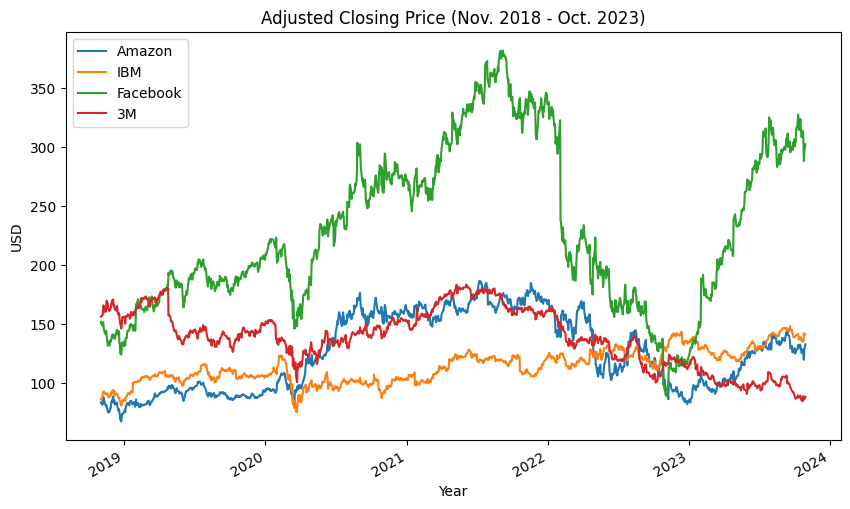

In [3]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'META', 'MMM', 'IBM']
all_stocks = yf.download(all_stocks_list, start = start, end=end)
all_stocks.describe
all_stocks=all_stocks.rename(columns={'AMZN': 'Amazon', 'META': 'Facebook', 'MMM':'3M'})

TimeSeries_date=all_stocks['Adj Close'].plot(figsize=(10,6))
TimeSeries_date.set_xlabel('Year')
TimeSeries_date.set_ylabel('USD')
TimeSeries_date.set_title('Adjusted Closing Price (Nov. 2018 - Oct. 2023)')


3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.


,Amazon,IBM,Facebook,3M
Date,,,,
2018-11-30,84.508499,93.089043,140.610001,170.031342
2018-12-31,75.098503,85.148720,131.089996,155.818420
2019-01-31,85.936501,100.692268,166.690002,163.799896
2019-02-28,81.991501,104.676949,161.449997,170.770477
2019-03-29,89.037498,106.927673,166.690002,171.091629
2019-04-30,96.325996,106.298683,193.399994,156.047592
2019-05-31,88.753502,97.378052,177.470001,132.667938
2019-06-28,94.681503,105.744003,193.000000,143.954056
2019-07-31,93.338997,113.672890,194.229996,145.100113


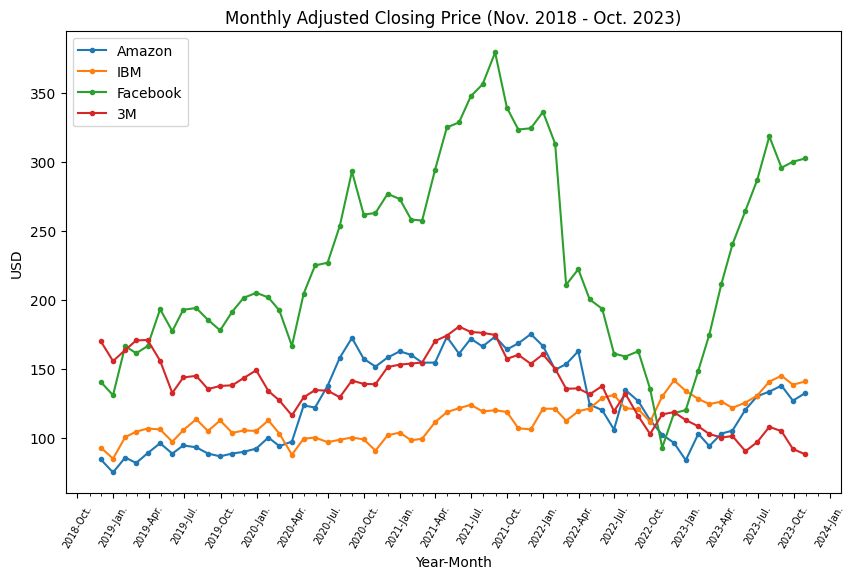

In [9]:
TimeSeries_month=all_stocks.resample('BM').last()

fig, ax = plt.subplots()
ax.plot(TimeSeries_month['Adj Close'], '-o',markersize=3)
fig.set_figheight(6)
fig.set_figwidth(10)

months = mdate.MonthLocator()  # every month
ax.xaxis.set_minor_locator(months)
ax.legend(TimeSeries_month['Adj Close'].columns, loc="upper left")
dtFmt = mdate.DateFormatter('%Y-%b.') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.gca().xaxis.set_major_locator(mdate.MonthLocator(interval=3))
plt.xticks(rotation=60, fontweight='light',  fontsize='x-small',)
ax.set_xlabel('Year-Month')
ax.set_ylabel('USD')
ax.set_title('Monthly Adjusted Closing Price (Nov. 2018 - Oct. 2023)')

TimeSeries_month['Adj Close']

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

    **Answer**
    
    The plot below is for the autocorrelation of stocks by Month. From this plot, we see that the autocorrelation between the stock-adjusted closing price on a given month and the price on the previous month (where the x-axis = 1) is around ±0.25. 
    
      1.  The dashed line is a 99% confidence interval (CI) and the solid line is 95% CI. The CI, suggests that the price of each stock has a low correlation with its previous price (~ ±0.25). 

      2. Most of the correlations (except for the early stage, 15-25 months) fall within 95% confidence limits: The confidence intervals are used to show which autocorrelations are significant. As you rightly observed, a couple of peaks jump out of this region and this tells us that these few correlations are statistically significant, the rest is random. We can see from the early stage(15-25 month), that Amazon, Facebook and 3M shows significant negative autocorrelation (above 95% CI) at those lags; however, for the rest later period, it looks like a random pattern. 

      
      3. In my opinion, this time-series might not be worth forecasting: As per stock, there are a couple of statistically significant weak correlations in this dataset. But they are not strong, so a periodicity-based forecasting model probably wouldn't be very accurate. 

      4. The overall shape of the plot of every stock indicates the decay of correlations over time but they all revealed slow decay, which suggests they are long-term dependencies. 

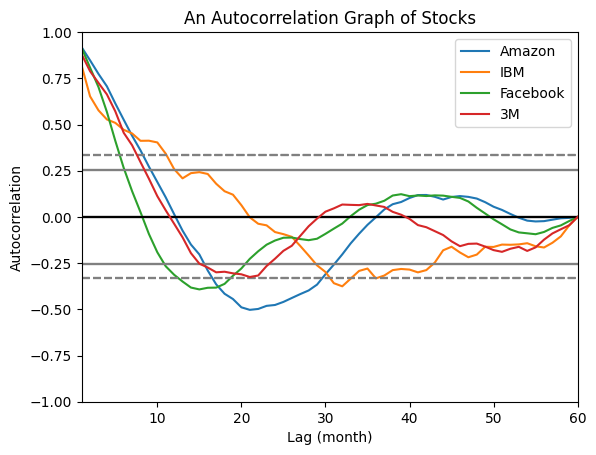

In [5]:
for stock in TimeSeries_month['Adj Close'].columns:
   ax = pd.plotting.autocorrelation_plot(TimeSeries_month['Adj Close'][stock].dropna(), label = stock)
   plt.title('An Autocorrelation Graph of Stocks')
   ax.set_xlabel('Lag (month)')

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

    **Answer**
    
    The plot below shows the degree of autocorrelation between the return of each stock this month and the return of stocks n months back, where n is the x-axis. The autocorrelation between the returns on a given month and the returns on the previous month is around ±0.25. 
    
    1.  All the correlations fall within 95% confidence limits: We can conclude that there is very weak/or even no autocorrelation over time for all the stocks.  
    
    2. In my opinion, this time series might not be worth forecasting, and the monthly returns per stock reveal random distribution since there is no significance point, even the decay pattern is hard to observe from the plot. 

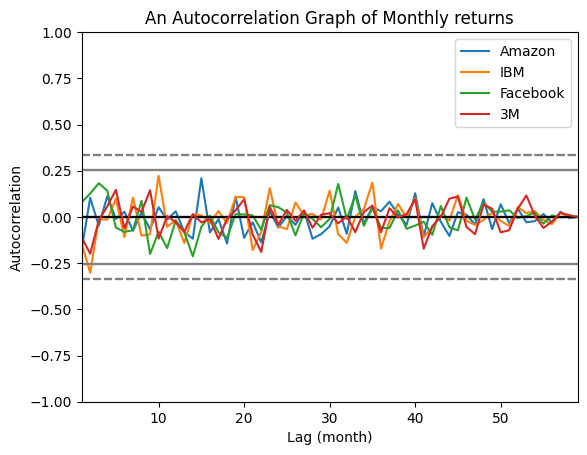

In [16]:

Monthly_returns=((TimeSeries_month-TimeSeries_month.shift(1))/TimeSeries_month.shift(1))*100 # Monthly return: ((Price of Feb - Price of Jan) / Price of Jan.) * 100%
Monthly_returns['Adj Close']

for stock in Monthly_returns['Adj Close'].columns:
   ax = pd.plotting.autocorrelation_plot(Monthly_returns['Adj Close'][stock].dropna(), label = stock)
   plt.title('An Autocorrelation Graph of Monthly returns')
   ax.set_xlabel('Lag (month)')


6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

    **Answer**
    
    Generally, all the pairs of point clusters show the pattern from bottom-left to top-right, which suggests a positive correlation relationship. However, the points all look pretty spread, and this explains the weak/no relationship between each stock. From the histogram distribution of monthly returns, they all look randomly distributed which aligns with the autocorrelation plot above, revealing no significant autocorrelation.
    

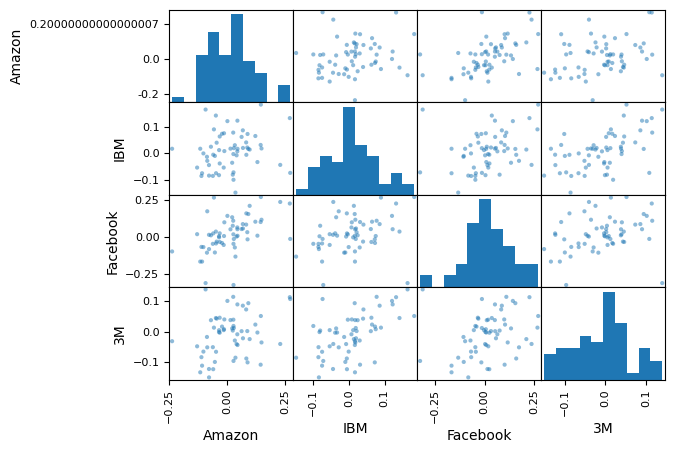

In [11]:
# 4 time series
Daily_returns=all_stocks.pct_change()
Monthly_returns=TimeSeries_month.resample('BM').last().pct_change() # We can use pct_chnage() instead of using shift()

ax=pd.plotting.scatter_matrix(Monthly_returns['Adj Close'].dropna(), alpha=0.5, grid=False, diagonal='hist', marker='.')
